In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

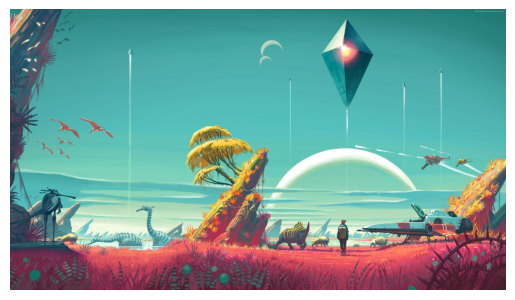

In [7]:
#F:\Downloads\anime.jpg
img = plt.imread("anime.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

In [83]:
print('Enter the number of samples:')
samples =int(input())

Enter the number of samples:
1000


In [84]:
w,h,d = img.shape
img_array = img.reshape(w*h,d)
print(img_array.shape)
# Normalize range between [0,1]
img_array = img_array/255 

(8240400, 3)


In [85]:
from sklearn.utils import shuffle

# fitting model on a small sub sample of the complete image

img_array_sample = shuffle(img_array,random_state=1)[:samples]
img_array_sample.size

3000

In [86]:
kmeans = KMeans(n_clusters = 6,random_state=1)
kmeans.fit(img_array_sample)

KMeans(n_clusters=6, random_state=1)

In [87]:
labels = kmeans.predict(img_array)

In [88]:
c=kmeans.cluster_centers_

In [89]:
# to create orginal image by labeles we need a function

In [90]:
def recreate_image(c,labels,w,h,d):
    image = np.zeros((w,h,d))
    label_idx=0
# now label each pixels according to the limited labels
    for i in range(w):
        for j in range(h):
            image[i][j]=c[labels[label_idx]]
            #print(labels[label_idx])
            label_idx+=1
    return(image)

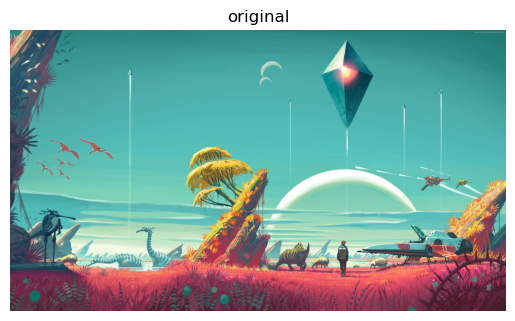

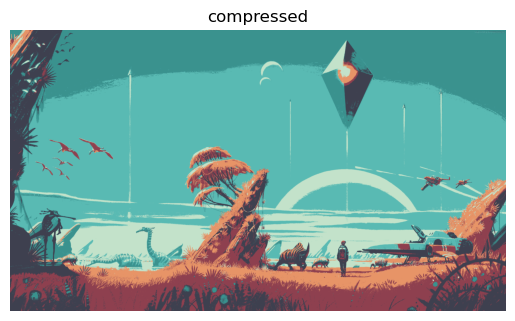

In [91]:
plt.figure(1)
plt.axis('off')
plt.title('original')
plt.imshow(img)
plt.figure(2)
plt.axis('off')
plt.title('compressed')
plt.imshow(recreate_image(c,labels,w,h,d))

In [92]:
print('Enter the File Name:')
file_name =input()
file_name = file_name+'.jpg'

Enter the File Name:
comp2


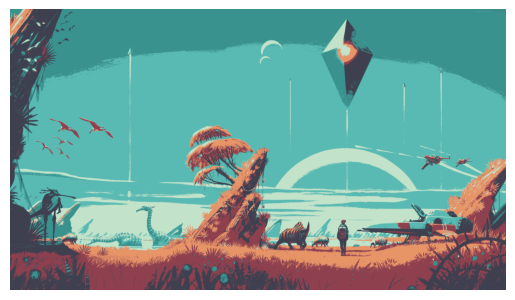

In [93]:
plt.imshow(recreate_image(c,labels,w,h,d))
plt.axis('off')
plt.savefig(file_name,bbox_inches='tight')